In [3]:
import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation
from sklearn.metrics import accuracy_score

import numpy as np
from matplotlib import pyplot as plt
from IPython.display import clear_output

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X=X_test # to store original array of testing for displaying it later after prediction

In [5]:
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.

In [6]:
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.accuracy = []
        self.val_accuracy = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.accuracy.append(logs.get('acc'))
        self.val_accuracy.append(logs.get('val_acc'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss on training set")
        plt.plot(self.x, self.val_losses, label="loss on validataion set")
        plt.plot(self.x, self.accuracy, label="accuracy on training set")
        plt.plot(self.x, self.val_accuracy, label="accuracy on validataion set")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

In [7]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

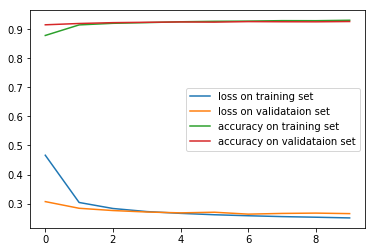

In [8]:
history = model.fit(X_train, Y_train,
          epochs=10,
          validation_data=(X_test, Y_test),
          callbacks=[plot_losses],
          verbose=0)

Predicted Digit is  9
The actual image was :


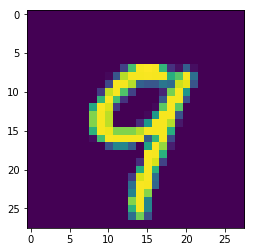

In [130]:
y_pred = model.predict(X_test)
i=12                     ##### check for i'th test data sample
print "Predicted Digit is ",np.argmax(y_pred[i])
print "The actual image was :"
plt.imshow(X[i]) 

In [131]:
count = 0 
for i in range(y_test.shape[0]):
    if y_test[i] == np.argmax(y_pred[i]):
        count = count + 1
print "Test Accuracy :",100.0*count/y_test.shape[0]

Test Accuracy : 92.9


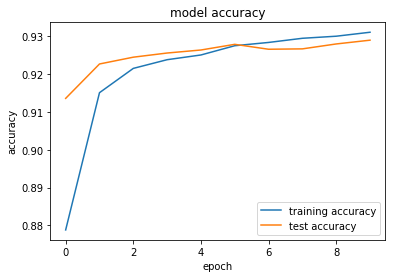

In [132]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training accuracy', 'test accuracy'], loc='bottom right')
plt.show()

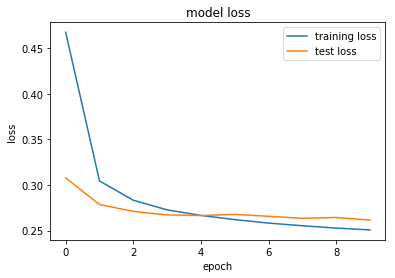

In [133]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'test loss'], loc='upper right')
plt.show()